In [148]:
import numpy as np
import matplotlib.pyplot as plt

def UniformQuantizer(in_val, n_bits, xmax, m):
    L = 2 ** n_bits
    delta = 2 * xmax / L
    q_ind = np.floor((in_val + xmax + m * delta / 2) / delta)
    q_ind = np.clip(q_ind, 0, L - 1)
    return q_ind.astype(int)

In [149]:
def UniformDequantizer(q_ind, n_bits, xmax, m):
    L = 2**n_bits
    delta = 2 * xmax / L
    deq_val = (q_ind * delta) - (m * delta / 2) - xmax + delta / 2
    return deq_val

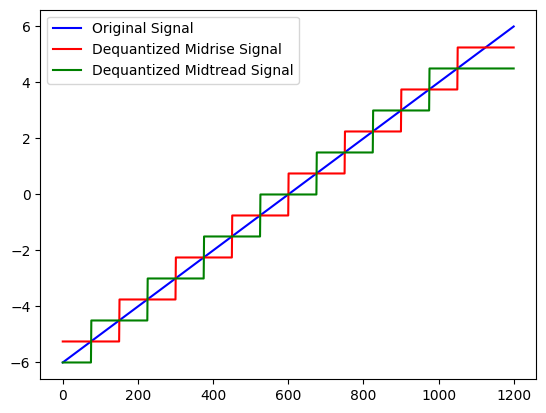

In [150]:
def test():
    ramp_signal = np.arange(-6, 6.01, 0.01)
    n_bits = 3
    xmax = 6
    q_ind_midtread = UniformQuantizer(ramp_signal, n_bits, xmax, 1)
    deq_val_midtread = UniformDequantizer(q_ind_midtread, n_bits, xmax, 1)
    q_ind_midrise = UniformQuantizer(ramp_signal, n_bits, xmax, 0)
    deq_val_midrise = UniformDequantizer(q_ind_midrise, n_bits, xmax, 0)

    plt.plot(ramp_signal, color="b", label="Original Signal")
    plt.plot(deq_val_midrise, color="r", label="Dequantized Midrise Signal")
    plt.plot(deq_val_midtread, color="g", label="Dequantized Midtread Signal")
    plt.legend()
    plt.show()


test()

### Test Four

In [151]:
def plot_SNR(random_signal: np.ndarray) -> None:
    n_bits = np.arange(2, 9)
    xmax = 5
    m = 0

    simulated_SNR_values = []
    theoritical_SNR_values = []

    for bits in n_bits:
        q_ind = UniformQuantizer(in_val=random_signal, n_bits=bits, xmax=xmax, m=m)
        deq_val = UniformDequantizer(q_ind=q_ind, n_bits=bits, xmax=xmax, m=m)

        quantization_error = random_signal - deq_val

        E_x2 = np.mean(random_signal**2)
        E_error2 = np.mean(quantization_error**2)

        simulated_SNR = E_x2 / E_error2

        simulated_SNR_db = 10 * np.log10(simulated_SNR)
        theoritical_SNR_db = 10 * np.log10(4) * bits

        theoritical_SNR_values.append(theoritical_SNR_db)
        simulated_SNR_values.append(simulated_SNR_db)

    plt.plot(n_bits, theoritical_SNR_values, "ro--", label="Theoritical SNR")
    plt.plot(n_bits, simulated_SNR_values, "bo", label="Simulation SNR")
    plt.xlabel(r"$n_{bits}$")
    plt.ylabel(r"$SNR_{db}$")
    plt.title(f"Comparison Between Theoritical SNR and Simulated SNR")
    plt.legend()
    plt.show()

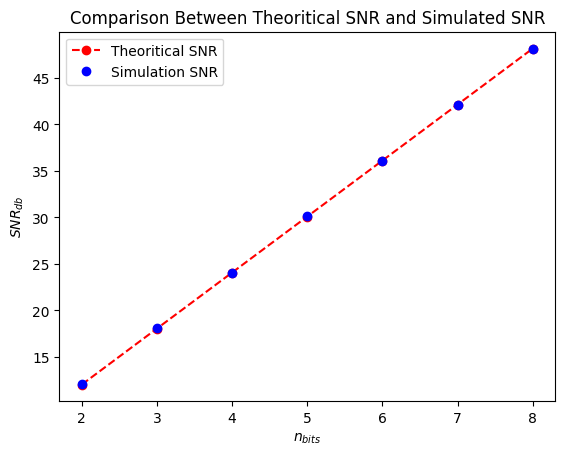

In [152]:

random_signal = np.random.uniform(low=-5, high=5, size=10000)
plot_SNR(random_signal=random_signal)

In [153]:
def mu_law_compression(x, mu):
    return np.sign(x) * ((np.log1p(mu * np.abs(x))) / np.log1p(mu))


def mu_law_expansion(y, mu):
    return np.sign(y) * ((np.log1p(mu * np.abs(y))) / np.log1p(mu))


def mu_law_quantizer(in_val, n_bits, xmax, m, mu):
    compressed_signal = mu_law_compression(x=(in_val / xmax), mu=mu)
    q_ind = UniformQuantizer(in_val=compressed_signal, n_bits=n_bits, xmax=1, m=m)
    deq_val = UniformDequantizer(q_ind=q_ind, n_bits=n_bits, xmax=1, m=m)
    expanded_signal = mu_law_expansion(y=deq_val, mu=mu) * xmax
    return expanded_signal


def plot_compressed_signal_SNR(random_signal: np.ndarray) -> None:
    n_bits = np.arange(2, 9)
    mu_values = [0.001, 5, 100, 200]

    xmax = 5
    m = 0
    
    for mu in mu_values:
        theoritical_SNR_values = []
        simulated_SNR_values = []

        for bits in n_bits:
            quantized_signal = mu_law_quantizer(
                in_val=random_signal, n_bits=bits, xmax=xmax, m=m, mu=mu
            )

            quantization_error = random_signal - quantized_signal

            E_x2 = np.mean(random_signal**2)
            E_error2 = np.mean(quantization_error**2)

            simulated_SNR = E_x2 / E_error2

            simulated_SNR_db = 10 * np.log10(simulated_SNR)

            theoritical_SNR_db = 10 * np.log10(4) * bits + 10 * np.log10(
                (3 / (np.log(1 + mu) ** 2))
            )

            theoritical_SNR_values.append(theoritical_SNR_db)
            simulated_SNR_values.append(simulated_SNR_db)

        plt.plot(n_bits, theoritical_SNR_values, "o-", label=rf"Theoritical $\mu={mu}$")
        plt.plot(n_bits, simulated_SNR_values, "o-", label=rf"Actual $\mu={mu}$")
        plt.xlabel(r"$n_{bits}$")
        plt.ylabel(r"$SNR_{db}$")
        plt.title(f"Comparison Between Theoritical SNR and Simulated SNR")
        plt.legend()

### Test Five, and Six

In [154]:
magnitude = np.random.exponential(scale=1.0, size=10000)
polarity = np.random.choice([-1, 1], size=10000)
random_signal = magnitude * polarity

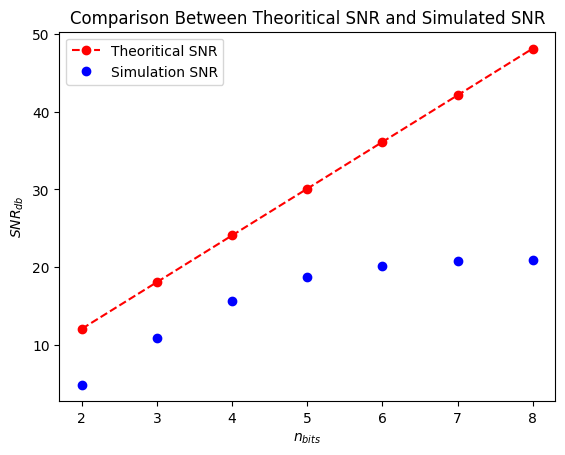

In [155]:
plot_SNR(random_signal=random_signal)

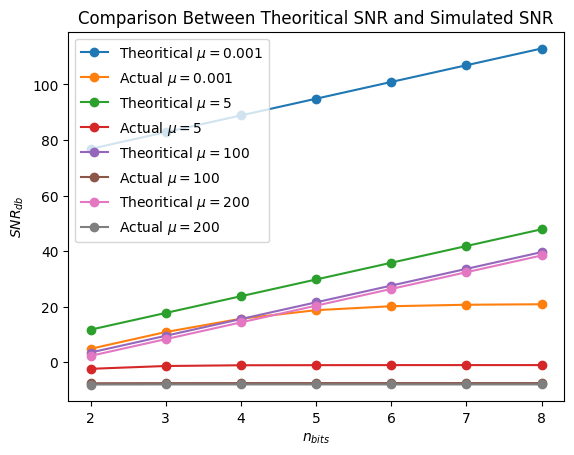

In [156]:
plot_compressed_signal_SNR(random_signal=random_signal)